In [1]:
import  numpy as np

from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784',version=1)
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [2]:
x,y=mnist['data'],mnist['target']
x.shape
y.shape

(70000,)

In [3]:
import matplotlib as mpl
from matplotlib import pyplot as plt
some_digits=x[0]
some_digit_image=some_digits.reshape(28,28)
plt.imshow(some_digit_image,cmap="binary")
plt.axis("off")
plt.show()
y[0]




<Figure size 640x480 with 1 Axes>

'5'

In [4]:
y = y.astype(np.uint8)
x_train,x_test,y_train,y_test=x[:60000],x[60000:],y[:60000],y[60000:]

In [5]:
y_train_five=(y_train==5)
y_test_five=(y_test==5)



In [6]:
from sklearn.linear_model import SGDClassifier
sgd_clf =SGDClassifier(max_iter=1000,tol=1e-3,random_state=42)
sgd_clf.fit(x_train,y_train_five)
sgd_clf.predict([some_digits])

array([ True])

In [7]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,x_train,y_train_five,cv=3,scoring="accuracy")


array([0.95035, 0.96035, 0.9604 ])

In [8]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds=StratifiedKFold(n_splits=3,random_state=42)

for train_index,test_index in skfolds.split(x_train,y_train_five):
    clone_clf=clone(sgd_clf)
    x_train_flods= x_train[train_index]
    y_train_folds= y_train_five[train_index]
    x_test_fold = x_train[test_index]
    y_test_fold = y_train_five[test_index]
    
    clone_clf.fit(x_train_flods,y_train_folds)
    y_pred=clone_clf.predict(x_test_fold)
    n_correct=sum(y_pred==y_test_fold)
    print(n_correct/len(y_pred))


0.95035
0.96035
0.9604


In [9]:
from sklearn.base import BaseEstimator
class NeverFiveClassifier(BaseEstimator):
    def fit(self,X,y=None):
        return self
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)

never_five_clf=NeverFiveClassifier()
cross_val_score(never_five_clf,x_train,y_train_five,cv=3,scoring="accuracy")


array([0.91125, 0.90855, 0.90915])

In [10]:
from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(sgd_clf,x_train,y_train_five,cv=3)




In [11]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_five,y_train_pred)



array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [12]:
y_train_perfect_predic=y_train_five
confusion_matrix(y_train_five,y_train_perfect_predic)



array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [13]:
from sklearn.metrics import precision_score,recall_score
precision_score(y_train_five,y_train_pred)
recall_score(y_train_five,y_train_pred)




0.6511713705958311

In [14]:
from sklearn.metrics import f1_score
f1_score(y_train_five,y_train_pred)

0.7325171197343846

In [15]:
y_scores=sgd_clf.decision_function([some_digits])
y_scores

array([2164.22030239])

In [16]:
threshold =0
y_some_digit_pred=(y_scores > threshold)
y_some_digit_pred

array([ True])

In [17]:
threshold =8000
y_some_digit_pred=(y_scores>threshold)
y_some_digit_pred


array([False])

In [20]:
y_scores=cross_val_predict(sgd_clf,x_train,y_train_five,cv=3,method="decision_function")
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds=precision_recall_curve(y_train_five,y_scores)




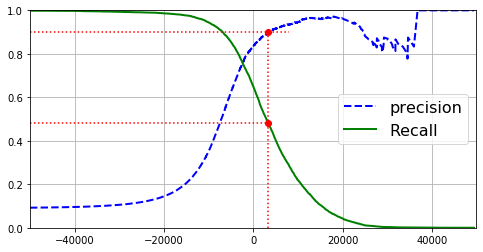

In [23]:
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],"b--",label="precision",linewidth=2)
    plt.plot(thresholds,recalls[:-1],'g-' ,label="Recall",linewidth=2)
    plt.legend(loc="center right",fontsize=16)
    plt.grid(True)
    plt.axis([-50000,50000,0,1])
recall_90_precision = recalls[np.argmax(precisions >=0.90)]
threshold_90_precision=thresholds[np.argmax(precisions >= 0.90)]
plt.figure(figsize=(8,4))
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.plot([threshold_90_precision,threshold_90_precision],[0.,0.9],"r:")
plt.plot([-50000,threshold],[0.9,0.9],"r:")
plt.plot([-50000,threshold_90_precision],[recall_90_precision,recall_90_precision],"r:")
plt.plot([threshold_90_precision],[0.9],"ro")
plt.plot([threshold_90_precision],[recall_90_precision],"ro")
plt.show()
